In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/cookies.csv")

In [3]:
data.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [4]:
data.shape

(5198, 16)

In [5]:
data.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'diameter', 'mixins',
       'crunch factor', 'aesthetic appeal'],
      dtype='object')

In [6]:
data.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

## Sugar to flour ratio

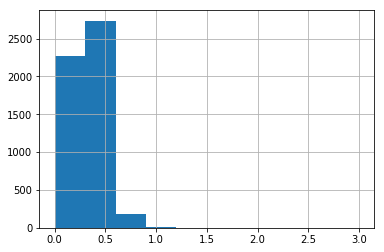

In [7]:
data["sugar to flour ratio"].hist()

In [8]:
data["sugar to flour ratio"].isnull().sum()

0

## Sugar Index

In [9]:
def description(x):
    null = data[x].isnull().sum()
    print("Numbers of Nulls: ", null)
    descript = data[x].describe()
    print("The descritption of this variable is: ", descript)
    plt.xticks(rotation=45)
    plt.xlabel(r"Bake time")
    plt.ylabel(r"Number")
    plt.title(r"Histogram Bake Time")
    dist = data[x].hist()
    plt.show()
    box = sns.boxplot(x=data[x])
    plt.show()
    

Numbers of Nulls:  0
The descritption of this variable is:  count    5198.000000
mean        0.318049
std         0.150036
min         0.000000
25%         0.240000
50%         0.310000
75%         0.390000
max         3.000000
Name: sugar to flour ratio, dtype: float64


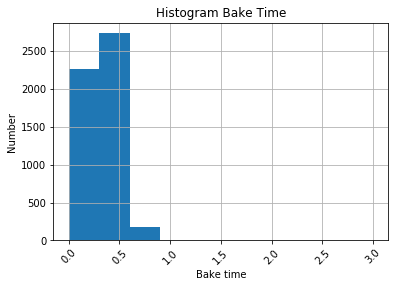

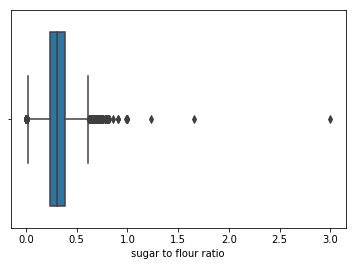

In [10]:
description("sugar to flour ratio")

In [11]:
description(data["sugar index"])

KeyError: "None of [Float64Index([  9.5,   3.3,   1.9,  10.5,   2.4, 18.15,   2.3,   2.6,   1.8,\n               12.9,\n              ...\n                1.6,   2.1,   1.8,   2.8,   7.9,   2.0,   1.5,  14.3,   1.4,\n                1.8],\n             dtype='float64', length=5198)] are in the [columns]"

In [ ]:
description(data["chill time"])

In [ ]:
description("bake time")

In [ ]:
sns.scatterplot(x="bake time",y="chill time",hue="quality", data=data, palette="Set1")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
# Filling Nulls values with the mean for the column sugar index

In [ ]:
data[data["sugar index"].isnull()]

In [ ]:
#Filling Sugar index with the mean
data["sugar index full"] = data["sugar index"].fillna(data["sugar index"].mean())

In [ ]:
#Filling bake time with the mean
data["bake time full"] = data["bake time"].fillna(data["bake time"].mean())

In [ ]:
data.head()

In [ ]:
data[data["quality"]>9]

In [ ]:
#What's make a great cookie!


In [ ]:
butter = data.groupby("butter type", as_index=False).agg({"quality":"mean"})
plt.xticks(rotation=0)
plt.title(r"Quality per butter type")
sns.barplot(x="butter type",y="quality", data=butter)

In [ ]:
dens = data.groupby("quality", as_index=False).agg({"calories":"mean"})
plt.xticks(rotation=0)
plt.title(r"Calories mean per Quality")
sns.barplot(x="quality",y="calories", data=dens)

In [41]:
data["mixins_c"] = data["mixins"].str.split(",")

In [43]:
len(data)

5198

In [44]:
for x in range(len(data)):
    try:
        data.loc[x,"mixins_c"] = len(data.loc[x,"mixins_c"])
    except:
        pass
        

In [30]:
x = data.mixins_c.tolist()


In [47]:
data["mixins_c"].value_counts()

1    3112
2    1787
3     297
Name: mixins_c, dtype: int64

In [60]:
data.groupby("quality").agg({"")

In [59]:
ingredients = data.groupby("quality", as_index=False).agg({"mixins_c":"mean"})

plt.xticks(rotation=0)
plt.title(r"Calories mean per Quality")
sns.barplot(x="quality",y="mixins_c", data=ingredients)

DataError: No numeric types to aggregate

In [17]:
data["igre"] = data["mixins_c"].apply(counta)

TypeError: object of type 'float' has no len()

In [ ]:
#data["igre"] = 

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib as plt

%matplotlib inline

In [ ]:
df = pd.read_csv("../data/data_2.csv")
target = "quality"

In [ ]:
df.drop(columns=["melted","mixins"])

In [ ]:
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
#Split DF into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Grid search for parameter selection for a Random Forest Classifier model
param_grid = {
    'n_estimators': [25, 50],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [10, 5]
}

In [ ]:
#Model creation:
RFR = RandomForestRegressor(n_jobs=-1)
GS = GridSearchCV(RFR, param_grid, cv=5, verbose = 3)

In [ ]:
#LAUNCH MODEL:
GS.fit(X_train, y_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
cookies_model = LinearRegression()